## Samplers

In [1]:
include("spde/utilities/Samplers.jl")
using .Samplers


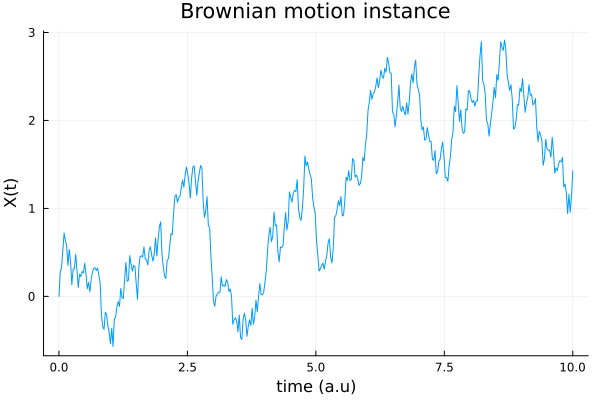

In [2]:
using Plots
# sample a path and generate a simple brownian sample
t = collect(range(0.0, 10.0, length=400)) 
X = brownian_sampler(t)

plot(t,X,    
xlabel = "time (a.u)",
ylabel = "X(t)",
legend = false,
title  = "Brownian motion instance")

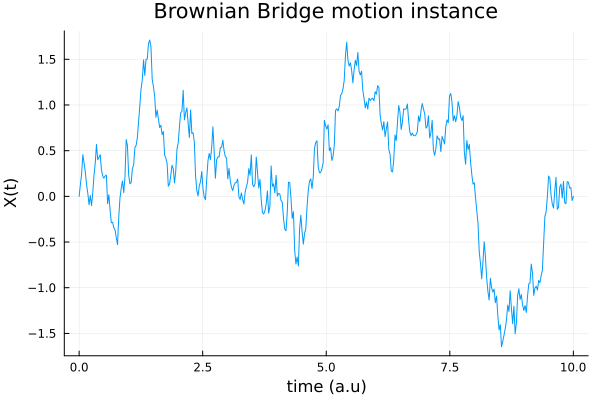

In [3]:
# Brownian brownian_bridge_sampler

X_brownian_bridge = brownian_bridge_sampler(t)

plot(t,X_brownian_bridge,    
xlabel = "time (a.u)",
ylabel = "X(t)",
legend = false,
title  = "Brownian Bridge motion instance")


Factional brownian motion H=0.8

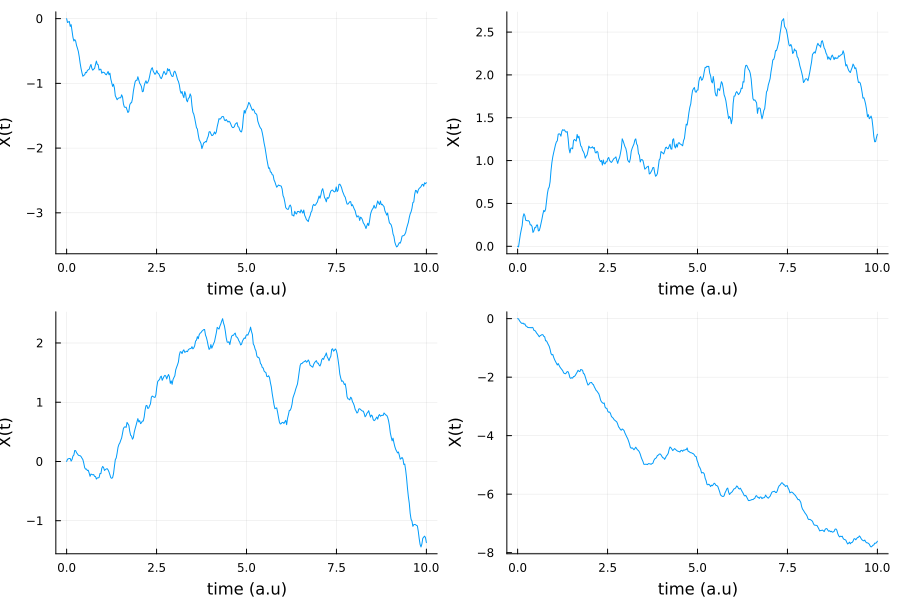

In [4]:
# Defines the fractional brownian motion sampler with fractional parameter heatmap

grid_x, grid_y = 2,2
H = 0.8
plot_list = Any[]

for grid_i in 1:grid_x
    for grid_j in 1:grid_y
        
        X_fractional_sample = fractional_brownian_sampler(t,H)
        p = plot(t,X_fractional_sample,
            xlabel = "time (a.u)",
            ylabel = "X(t)",
            legend = false)
        push!(plot_list, p)
    end
end

print("Factional brownian motion H=", H)
plot(plot_list..., layout=(grid_x,grid_y),
    size=(900,600))

Cosine Covariance0.8

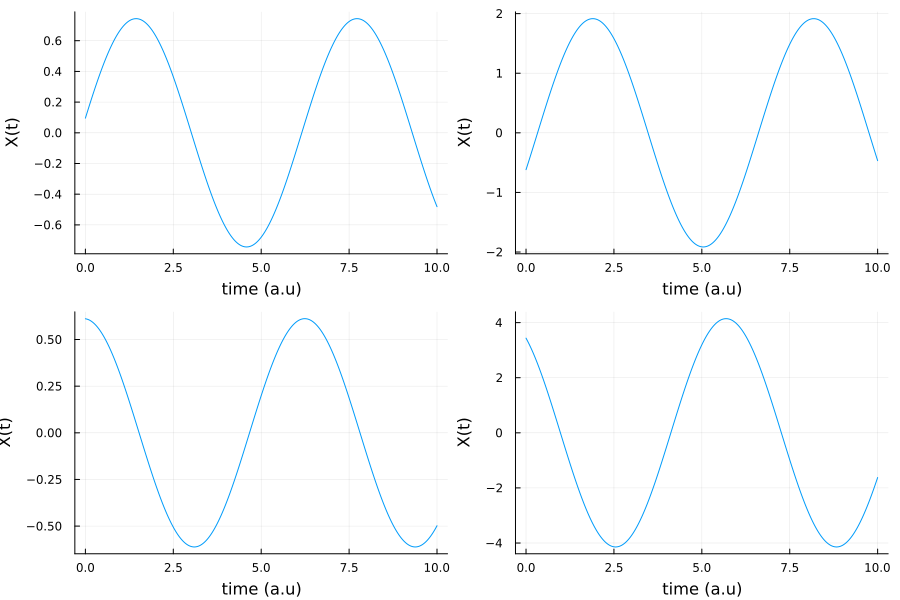

In [5]:

# provide a cosine estimator
Covariance(s,tv) = cos(s-tv)
mean(tv) = 0.0

plot_list = Any[]

for grid_i in 1:grid_x
    for grid_j in 1:grid_y
        
        X_cosine_covariance = general_gaussian_process_sampler(t,mean,Covariance)

        p = plot(t,X_cosine_covariance,
            xlabel = "time (a.u)",
            ylabel = "X(t)",
            legend = false)
        push!(plot_list, p)
    end
end

print("Cosine Covariance", H)
plot(plot_list..., layout=(grid_x,grid_y),
    size=(900,600))



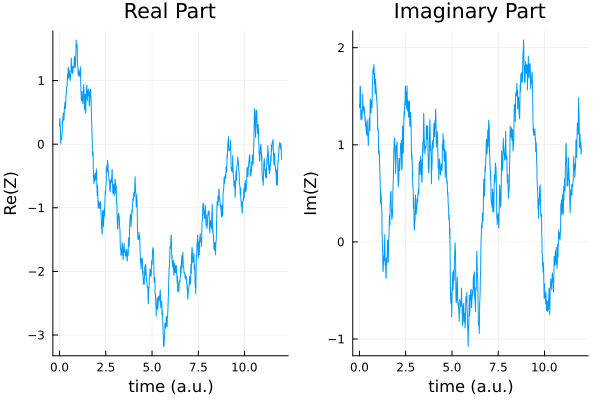

In [6]:

l = 2.0
exponential_spectral_f(ν) = l / (π *(1+l^2 * ν^2 ))

N_times = 1000
M = 500
t_final = 12.0
Z_spectral = spectral_quadrature_sampler(t_final,N_times,M,exponential_spectral_f)

t_spectral = collect(range(0.0, t_final, length=N_times))
Z_spectral
# Extract real and imaginary parts
real_part = real(Z_spectral)
imag_part = imag(Z_spectral)

# Plot side by side using layout
p1 = plot(t_spectral,real_part, title="Real Part", xlabel="time (a.u.)", ylabel="Re(Z)", legend=false)
p2 = plot(t_spectral,imag_part, title="Imaginary Part", xlabel="time (a.u.)", ylabel="Im(Z)", legend=false)

# Display side by side
plot(p1, p2, layout=(1,2))



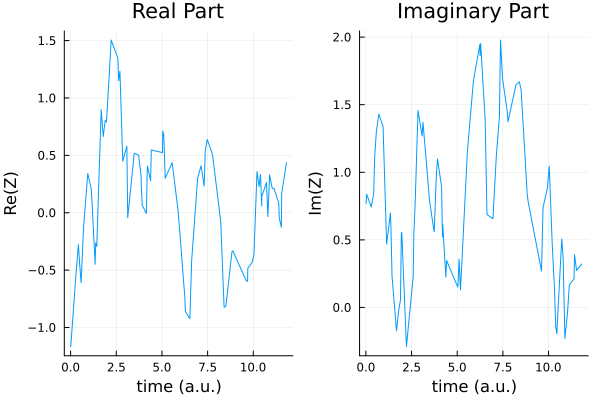

In [7]:

# usa an interpolator to sample at non-uniform times
lower_bound = 0.0
upper_bound = t_final
num_samples = 80

s = sort(lower_bound .+ (upper_bound - lower_bound) .* rand(num_samples))
Z_non_uniform = interpolated_spectral_quadrature_sampler(s,N_times,M,exponential_spectral_f)

# Extract real and imaginary parts
real_part = real(Z_non_uniform)
imag_part = imag(Z_non_uniform)
# Plot side by side using layout
p1 = plot(s,real_part, title="Real Part", xlabel="time (a.u.)", ylabel="Re(Z)", legend=false)
p2 = plot(s,imag_part, title="Imaginary Part", xlabel="time (a.u.)", ylabel="Im(Z)", legend=false)

# Display side by side
plot(p1, p2, layout=(1,2))



The remainder of chapter 6 and chapter 7 discuss higher dimensional gaussian field sampling. Julia already has an excelent gaussian field sampler package in the  [GaussianRandomFields.jl package](https://github.com/PieterjanRobbe/GaussianRandomFields.jl). Below, we give an example gaussian random field sample using `GaussianRandomFields.jl`.

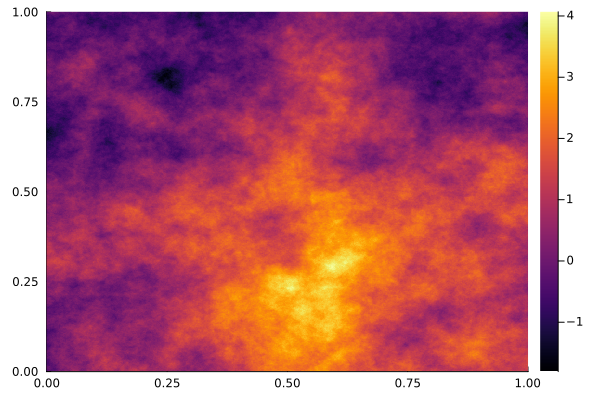

In [8]:
using GaussianRandomFields
cov = CovarianceFunction(2, Exponential(.5))
pts = range(0, stop=1, length=1001)
grf = GaussianRandomField(cov, CirculantEmbedding(), pts, pts, minpadding=2001)
heatmap(grf)
